In [2]:
############# Packages #############
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

In [48]:
class Naimark_sacker():
    def __init__(self, a, b, c0, c1, d, maxiter):
        self.a = a 
        self.b = b 
        self.c0 = c0 
        self.c1 = c1 
        self.d = d 
        self.maxiter = maxiter

    ############# g(r) #############
    def funcg(self, r, mu):
        return r + self.d*mu*r + self.a*r**3
    ################################

    ############# map x-y #############
    def xy_plane(self, z):
        x = z[0]*np.cos(z[1])
        y = z[0]*np.sin(z[1])
        return x, y 
    ###################################

    ############# map #############
    def map(self, z, mu):
        x = z 
        polar = np.empty(2)
        polar[0] = x[0] + self.d*mu*x[0] + self.a*x[0]**3 
        polar[1] = x[1] + self.c0 + self.c1*mu + self.b*x[0]**2 
        return polar 
    ###############################

    ############# orbit #############
    def calc_orbit(self, z_init, mu):
        x_init, y_init = self.xy_plane(z_init)
        x_lst = [x_init]; y_lst = [y_init]; z_lst = [z_init]
        for i in range(self.maxiter):
            curz = z_lst[-1]
            newz = self.map(curz, mu)
            newx, newy = self.xy_plane(newz)
            x_lst.append(newx); y_lst.append(newy); z_lst.append(newz)
        return x_lst, y_lst
    #################################


    ############# graph of g(r) #############
    def graph_gr(self):
        mu_lst = [-0.2, 0, 0.2]
        r_array = np.linspace(-np.pi, np.pi, 500)
        fig, axes = plt.subplots(1, 3, figsize=(16, 6))
        plt.subplots_adjust(wspace=0.4, hspace=0.6)
        for i in range(len(mu_lst)):
            axes[i].text(-2, 2.5, r"$\mu = {}$".format(mu_lst[i]))
            axes[i].set_xlabel(r"$r$"); axes[i].set_ylabel(r"$g(r)$")
            axes[i].set_xlim([-np.pi, np.pi])
            axes[i].plot(r_array, self.funcg(r_array, mu_lst[i]), c="k")
            axes[i].plot(r_array, r_array, c="k")
        plt.savefig("./7.7_funcg.svg")
    #########################################

    ############# trajectory in x-y plane #############
    def plot_trajectory(self):
        mu_lst = [-0.2, 0, 0.2]
        x_init_1 = np.array([2.5, 0])
        x_init_2 = np.array([0.25, 0])
        fig, axes = plt.subplots(1, 3, figsize=(16, 6))
        plt.subplots_adjust(wspace=0.4, hspace=0.6)
        for i in range(len(mu_lst)):
            axes[i].set_title(r"$\mu = {}$".format(mu_lst[i]))
            axes[i].set_xlabel(r"$x$"); axes[i].set_ylabel(r"$y$")
            x_lst_1, y_lst_1 = self.calc_orbit(x_init_1, mu_lst[i])
            axes[i].scatter(x_lst_1, y_lst_1, c="r", marker=".", s=10)
            if i == 2:
                x_lst_2, y_lst_2 = self.calc_orbit(x_init_2, mu_lst[i])
                axes[i].scatter(x_lst_2, y_lst_2, c="b", marker=".", s=10)
        plt.savefig("./7.7_trajectory.svg")
    ###################################################

In [33]:
############# Parameter #############
a = -0.1
b = 0.01
c0 = 0.2
c1 = 0 
d = 1
maxiter = 30
#####################################

In [49]:
############# Instance of the class #############
ns = Naimark_sacker(a=a, b=b, c0=c0, c1=c1, d=d, maxiter=maxiter)
#################################################

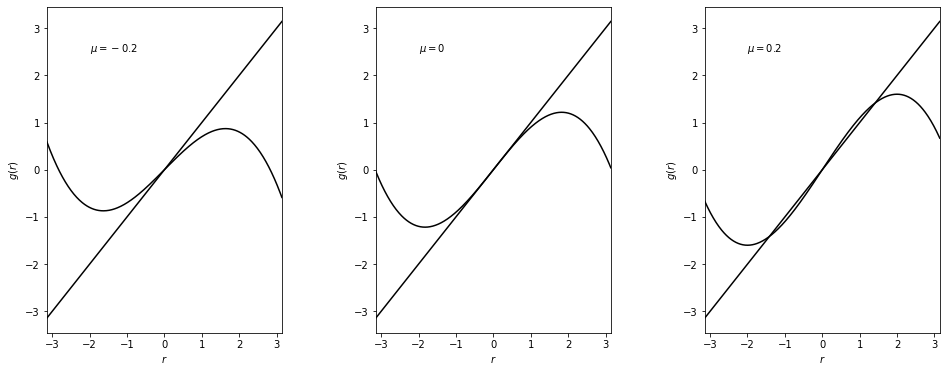

In [17]:
############# graph of g(r) #############
ns.graph_gr()
#########################################

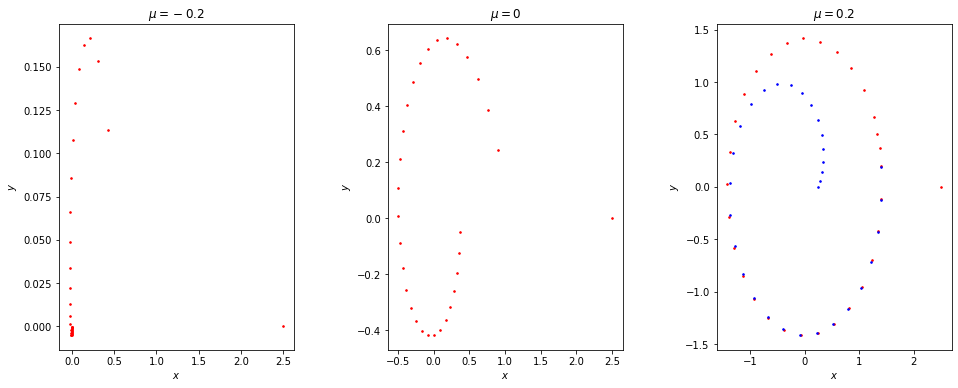

In [50]:
############# trajectory #############
ns.plot_trajectory()
######################################